## PDB construction

In [1]:
from torchdrug import data, utils
import pickle
import pandas as pd

In [2]:
path = "../../../data/dta-datasets/KIBA/"
protein_file = path + "kiba_proteins.csv"
protein_pkl = path + "pdb_Protein.pkl"

In [3]:
protein_df = pd.read_csv(protein_file)
protein_df

,Gene,Sequence,AA length,PDBID
0,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,431,O00141
1,O00311,MEASLGIQMDEPMAFSPQRDRFQAEGSLKKNEQNFKLAGVKKDIEK...,574,O00311
2,O00329,MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIK...,1044,O00329
3,O00418,MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDP...,725,O00418
4,O00444,MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKK...,970,O00444
...,...,...,...,...
224,Q9Y243,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...,479,Q9Y243
225,Q9Y463,MAVPPGHGPFSGFPGPQEHTQVLPDVRLLPRRLPLAFRDATSAPLR...,629,Q9Y463
226,Q9Y478,MGNTSSERAALERHGGHKTPRRDSSGGTKDGDRPKILMDSPEDADL...,270,Q9Y478
227,Q9Y4K4,MEAPLRPAADILRRNPQQDYELVQRVGSGTYGDVYKARNVHTGELA...,846,Q9Y4K4


In [4]:
protein_list = []  
pdbs = protein_df["PDBID"].tolist() 
for index in range(0, 128):
    # alphafold 3d pdb format 'AF-O06917-F1-model_v3.pdb'
    pdb_name = path + 'pdb/AF-' + pdbs[index] + '-F1-model_v4.pdb'
    print(pdb_name)
    protein = data.Protein.from_pdb(pdb_name)
    protein_list.append(protein)

../../../data/dta-datasets/KIBA/pdb/AF-O00141-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O00311-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O00329-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O00418-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O00444-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O14757-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O14920-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O14965-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O15075-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O15111-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O15264-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O15530-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O43293-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O43741-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O43781-F1-model_v4.pdb
../../../data/dta-datasets/KIBA/pdb/AF-O60285-F1-model_v4.pdb
../../..

In [5]:
len(protein_list)

128

P78527 need to process separately

In [7]:
p78527_list = []
for index in range(0, 3):
    pdb_name = path + 'pdb/P78527/AF-P78527-F' + str(index * 7 + 1) + '-model_v4.pdb'
    # print(pdb_name)
    protein = data.Protein.from_pdb(pdb_name)
    print(protein)
    p78527_list.append(protein)

Protein(num_atom=11082, num_bond=22620, num_residue=1400)
Protein(num_atom=11237, num_bond=22944, num_residue=1400)
Protein(num_atom=10641, num_bond=21728, num_residue=1328)


In [8]:
p78527_list

[Protein(num_atom=11082, num_bond=22620, num_residue=1400),
 Protein(num_atom=11237, num_bond=22944, num_residue=1400),
 Protein(num_atom=10641, num_bond=21728, num_residue=1328)]

In [9]:
p78527 = data.Protein.pack(p78527_list)
p78527

PackedProtein(batch_size=3, num_atoms=[11082, 11237, 10641], num_bonds=[22620, 22944, 21728], num_residues=[1400, 1400, 1328])

In [10]:
packed_p78527 = data.Protein.pack([p78527])
packed_p78527

PackedProtein(batch_size=1, num_atoms=[32960], num_bonds=[67292], num_residues=[4128])

In [11]:
p78527_pocket = packed_p78527.unpack()
p78527_pocket[0]

Protein(num_atom=32960, num_bond=67292, num_residue=4128)

In [22]:
p78527_pocket[0].num_residue

tensor(4128)

In [21]:
p78527_pocket[0].to_sequence()[2800:]  # . . for batch split 

'R.DPIIAKQLFSSLFSGILKEMDKFKTLSEKNNITQKLLQDFNRFLNTTFSFFPPFVSCIQDISCQHAALLSLDPAAVSAGCLASLQQPVGIRLLEEALLRLLPAELPAKRVRGKARLPPDVLRWVELAKLYRSIGEYDVLRGIFTSEIGTKQITQSALLAEARSDYSEAAKQYDEALNKQDWVDGEPTEAEKDFWELASLDCYNHLAEWKSLEYCSTASIDSENPPDLNKIWSEPFYQETYLPYMIRSKLKLLLQGEADQSLLTFIDKAMHGELQKAILELHYSQELSLLYLLQDDVDRAKYYIQNGIQSFMQNYSSIDVLLHQSRLTKLQSVQALTEIQEFISFISKQGNLSSQVPLKRLLNTWTNRYPDAKMDPMNIWDDIITNRCFFLSKIEEKLTPLPEDNSMNVDQDGDPSDRMEVQEQEEDISSLIRSCKFSMKMKMIDSARKQNNFSLAMKLLKELHKESKTRDDWLVSWVQSYCRLSHCRSRSQGCSEQVLTVLKTVSLLDENNVSSYLSKNILAFRDQNILLGTTYRIIANALSSEPACLAEIEEDKARRILELSGSSSEDSEKVIAGLYQRAFQHLSEAVQAAEEEAQPPSWSCGPAAGVIDAYMTLADFCDQQLRKEEENASVIDSAELQAYPALVVEKMLKALKLNSNEARLKFPRLLQIIERYPEETLSLMTKEISSVPCWQFISWISHMVALLDKDQAVAVQHSVEEITDNYPQAIVYPFIISSESYSFKDTSTGHKNKEFVARIKSKLDQGGVIQDFINALDQLSNPELLFKDWSNDVRAELAKTPVNKKNIEKMYERMYAALGDPKAPGLGAFRRKFIQTFGKEFDKHFGKGGSKLLRMKLSDFNDITNMLLLKMNKDSKPPGNLKECSPWMSDFKVEFLRNELEIPGQYDGRGKPLPEYHVRIAGFDERVTVMASLRRPKRIIIRGHDEREHPFLVKGGEDLRQDQRVEQLFQVMNGILAQDSACSQRALQLRTYSVVPMT

In [18]:
len(p78527_pocket[0].to_sequence())

4130

In [12]:
protein_list.append(p78527_pocket[0])

In [13]:
len(protein_list)

129

In [14]:
for index in range(129, 229):
    # alphafold 3d pdb format 'AF-O06917-F1-model_v3.pdb'
    pdb_name = path + 'pdb/AF-' + pdbs[index] + '-F1-model_v4.pdb'
    # print(pdb_name)
    protein = data.Protein.from_pdb(pdb_name)
    protein_list.append(protein)

In [15]:
len(protein_list)

229

In [16]:
with utils.smart_open(protein_pkl, "wb") as fout:
    pickle.dump(protein_list, fout)

## Pockets Segmentation

> p2rank is a pocket segment method only needingg PDB file.

### Dataset file build

In [1]:
import os
import sys
import pandas as pd
from tqdm import tqdm

In [2]:
data_path = "../../../data/dta-datasets/KIBA/"

In [3]:
protein = pd.read_csv(f'{data_path}kiba_proteins.csv')
protein

,Gene,Sequence,AA length,PDBID
0,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,431,O00141
1,O00311,MEASLGIQMDEPMAFSPQRDRFQAEGSLKKNEQNFKLAGVKKDIEK...,574,O00311
2,O00329,MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIK...,1044,O00329
3,O00418,MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDP...,725,O00418
4,O00444,MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKK...,970,O00444
...,...,...,...,...
224,Q9Y243,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...,479,Q9Y243
225,Q9Y463,MAVPPGHGPFSGFPGPQEHTQVLPDVRLLPRRLPLAFRDATSAPLR...,629,Q9Y463
226,Q9Y478,MGNTSSERAALERHGGHKTPRRDSSGGTKDGDRPKILMDSPEDADL...,270,Q9Y478
227,Q9Y4K4,MEAPLRPAADILRRNPQQDYELVQRVGSGTYGDVYKARNVHTGELA...,846,Q9Y4K4


In [4]:
prediction_folder = f"{data_path}p2rank"
os.system(f"mkdir -p {prediction_folder}")

0

In [5]:
protein.Gene.values

array(['O00141', 'O00311', 'O00329', 'O00418', 'O00444', 'O14757',
       'O14920', 'O14965', 'O15075', 'O15111', 'O15264', 'O15530',
       'O43293', 'O43741', 'O43781', 'O60285', 'O60674', 'O75116',
       'O75582', 'O75676', 'O94806', 'O95819', 'O96013', 'O96017',
       'P00519', 'P00533', 'P04049', 'P04626', 'P04629', 'P05129',
       'P05771', 'P06213', 'P06239', 'P06241', 'P06493', 'P07332',
       'P07333', 'P07947', 'P07948', 'P07949', 'P08069', 'P08581',
       'P08631', 'P08922', 'P09619', 'P09769', 'P10721', 'P11309',
       'P11362', 'P11802', 'P12931', 'P15056', 'P15735', 'P16234',
       'P16591', 'P17252', 'P17612', 'P17948', 'P19784', 'P21802',
       'P22455', 'P22607', 'P22612', 'P22694', 'P23443', 'P23458',
       'P24723', 'P24941', 'P27361', 'P27448', 'P28482', 'P29317',
       'P29323', 'P29376', 'P29597', 'P30291', 'P30530', 'P31749',
       'P31751', 'P34947', 'P35916', 'P35968', 'P36507', 'P36888',
       'P41240', 'P41279', 'P41743', 'P42336', 'P42338', 'P423

In [6]:
len(protein.Gene.values)

229

Build a `.ds` file for batch p2rank process, with the file path for each PDB.

In [7]:
ds = f"../../../data/dta-datasets/KIBA/p2rank/protein_list.ds"
with open(ds, "w") as out:
    for pdb in protein.Gene.values:
        out.write(f"pdb/AF-{pdb}-F1-model_v4.pdb\n")

In the p2rank code (/DTA_Work/data/processed-app/p2rank_2.4/) run the following preprocessing bash code in your terminal. `predict` means running the prediction on the target `protein_list.ds` file, which the computing threads are 6. `-c alphafold` means using alphafold config and model, this profile is recommended for AlphaFold models, NMR and cryo-EM structures since it doesn't depend on b-factor as a feature. Otherwise, the output will be different using default config.

In [ ]:
./prank predict -c alphafold /home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/KIBA/p2rank/protein_list.ds -threads 6

The command line output maybe like below:
- Be careful of the path `pdb/AF-{pdb}-F1-model_v4.pdb\n` which will concat with the code `/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/KIBA/p2rank/` path by default. So the real path is `/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/KIBA/p2rank/pdb/AF-{pdb}-F1-model_v4.pdb\n` one by one.

```bash
(base) marine@HomeLand:~/CodeBase/CurrentWork/Demo/DTA_Work/data/processed-app/p2rank_2.4$ ./prank predict -c alphafold /home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/KIBA/p2rank/protein_list.ds -threads 6
----------------------------------------------------------------------------------------------
 P2Rank 2.4
----------------------------------------------------------------------------------------------

predicting pockets for proteins from dataset [protein_list.ds]
processing [AF-O00329-F1-model_v4.pdb] (3/229)
processing [AF-O14757-F1-model_v4.pdb] (6/229)
processing [AF-O00444-F1-model_v4.pdb] (5/229)
......
......
......
processing [AF-Q9Y4K4-F1-model_v4.pdb] (228/229)
processing [AF-Q9Y6M4-F1-model_v4.pdb] (229/229)
predicting pockets finished in 0 hours 1 minutes 14.173 seconds
results saved to directory [/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/processed-app/p2rank_2.4/test_output/predict_protein_list]

----------------------------------------------------------------------------------------------
 finished successfully in 0 hours 1 minutes 14.911 seconds
----------------------------------------------------------------------------------------------

```

And I copy the output file into the p2rank file in the dataset. `/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/KIBA/p2rank/predict_protein_list` is the absolute path.

### p2rank Output

With one PDB file，there are two `csv` file.
- `/data/dta-datasets/Davis/p2rank/predict_protein_list/AF-A4VCI5-F1-model_v4.pdb_predictions.csv`
- `/data/dta-datasets/Davis/p2rank/predict_protein_list/AF-A4VCI5-F1-model_v4.pdb_residues.csv`
  
The `pdb_predictions.csv`contains the protein pocket details, include the probability and residue_ids for future work。
```csv
name     ,  rank,   score, probability, sas_points, surf_atoms,   center_x,   center_y,   center_z,           residue_ids,   surf_atom_ids
pocket1  ,     1,   23.59,       0.843,        135,         71,    -6.8074,     7.4196,     8.6606, A_191 A_192 A_196 ..., 1500 1501 1508 ...
pocket2  ,     2,    2.98,       0.078,         51,         25,     2.5313,    12.144,      -5.261, A_308 A_330 A_338 ..., 2452 2453 2456 ...
......
```

The `pdb_residues.csv` file contains each residue details of the protein.
```csv
chain, residue_label, residue_name,     score,  zscore, probability, pocket
    A,             1,          GLU,    0.0174, -0.3856,      0.0003,      0
    A,             2,          ARG,    0.0640, -0.3616,      0.0009,      0
......

For visualizations, you can change the code. There are raw outputs from the p2rank with a pml file for pymol software, like below. See more information from their website.  
![pml](../../../docs/figures/pml.png)

As you can see the green dots are the protein surface, the colorful part in the hole is the one of pocket zones(4 pockets in the protein) as the drug target.

### Subresidues Graph  

这里以一个蛋白质为例，试一下将一个蛋白质转化为多个离散的口袋子图（空间距离构建？），最好可视化一下。  
- 可能存在的问题是，口袋子图可能不是一个肽链上的氨基酸，而且边的连接是不是需要和原图一模一样，还是突出一下口袋的空间几何形状。

In [9]:
# demo for a pdb to generate a graph
import pandas as pd
from torchdrug import data
pdb_path = "../../../data/dta-datasets/KIBA/p2rank/pdb/AF-O00141-F1-model_v4.pdb"
csv_path = "../../../data/dta-datasets/KIBA/p2rank/predict_protein_list/AF-O00141-F1-model_v4.pdb_residues.csv"

In [10]:
pdb_residues = pd.read_csv(csv_path)
pdb_residues.columns = pdb_residues.columns.str.strip()  # 原始表格列名有空格，这里去除方便索引
pdb_residues

,chain,residue_label,residue_name,score,zscore,probability,pocket
0,A,1,MET,0.0463,-0.3707,0.0006,0
1,A,2,THR,0.0158,-0.3863,0.0003,0
2,A,3,VAL,0.0187,-0.3849,0.0003,0
3,A,4,LYS,0.0177,-0.3854,0.0003,0
4,A,5,THR,0.0065,-0.3911,0.0002,0
...,...,...,...,...,...,...,...
426,A,427,THR,0.1224,-0.3317,0.0023,4
427,A,428,ASP,0.0765,-0.3552,0.0011,0
428,A,429,SER,0.0771,-0.3549,0.0012,0
429,A,430,PHE,0.1601,-0.3123,0.0035,0


首先获取pocket的数量，从`pocket`列获取不重复数字，即不重复的口袋数量，目的是获取非0（0表示该氨基酸不属于任何一个口袋）的子图。

In [11]:
pocket_list = pdb_residues["pocket"].unique()
pocket_list

array([0, 2, 6, 4, 1, 3, 5, 7])

通过条件索引分别得到pocket=1-8的氨基酸索引，这里的索引相比真实的氨基酸序号少1（从1开始），但是最后输出子图的时候是对的。

In [12]:
pdb_residues[pdb_residues["pocket"] == 1].index.tolist()

[103,
 104,
 105,
 106,
 111,
 124,
 126,
 145,
 159,
 175,
 176,
 177,
 178,
 181,
 182,
 225,
 226,
 228,
 238,
 239,
 383,
 384,
 385,
 388]

In [13]:
pocket_num = len(pocket_list) - 1
pocket_index = []
total_index = []
for i in range(pocket_num):
    print(f"===== Pocket {i} =====")
    current_pocket = pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist()
    total_index.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
    print(current_pocket)
    pocket_index.append(current_pocket)

===== Pocket 0 =====
[103, 104, 105, 106, 111, 124, 126, 145, 159, 175, 176, 177, 178, 181, 182, 225, 226, 228, 238, 239, 383, 384, 385, 388]
===== Pocket 1 =====
[14, 18, 21, 22, 184, 185, 188, 189, 386]
===== Pocket 2 =====
[107, 108, 138, 141, 142, 221, 242]
===== Pocket 3 =====
[89, 91, 92, 96, 116, 118, 119, 163, 423, 424, 426]
===== Pocket 4 =====
[155, 207, 210, 211, 345, 346, 349, 359, 360, 363]
===== Pocket 5 =====
[85, 87, 166, 418, 419, 421]
===== Pocket 6 =====
[325, 329, 337, 339, 347, 351]


In [14]:
total_index.sort()

In [15]:
total_index

[14,
 18,
 21,
 22,
 85,
 87,
 89,
 91,
 92,
 96,
 103,
 104,
 105,
 106,
 107,
 108,
 111,
 116,
 118,
 119,
 124,
 126,
 138,
 141,
 142,
 145,
 155,
 159,
 163,
 166,
 175,
 176,
 177,
 178,
 181,
 182,
 184,
 185,
 188,
 189,
 207,
 210,
 211,
 221,
 225,
 226,
 228,
 238,
 239,
 242,
 325,
 329,
 337,
 339,
 345,
 346,
 347,
 349,
 351,
 359,
 360,
 363,
 383,
 384,
 385,
 386,
 388,
 418,
 419,
 421,
 423,
 424,
 426]

导入蛋白质的残基图

In [16]:
# sequence = "MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACKHPEVQSILKISQPQEPELMNANPSPPPSPSQQINLGPSSNPHAKPSDFHFLKVIGKGSFGKVLLARHKAEEVFYAVKVLQKKAILKKKEEKHIMSERNVLLKNVKHPFLVGLHFSFQTADKLYFVLDYINGGELFYHLQRERCFLEPRARFYAAEIASALGYLHSLNIVYRDLKPENILLDSQGHIVLTDFGLCKENIEHNSTTSTFCGTPEYLAPEVLHKQPYDRTVDWWCLGAVLYEMLYGLPPFYSRNTAEMYDNILNKPLQLKPNITNSARHLLEGLLQKDRTKRLGAKDDFMEIKSHVFFSLINWDDLINKKITPPFNPNVSGPNDLRHFDPEFTEEPVPNSIGKSPDSVLVTASVKEAAEAFLGFSYAPPTDSFL"
protein = data.Protein.from_pdb(pdb_path, atom_feature=None, bond_feature=None, residue_feature="default")
protein 

Protein(num_atom=3454, num_bond=7092, num_residue=431)

In [17]:
protein.residue_number

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

Subgraph with `data.Protein.subresidue` Method:

In [18]:
pocket_0 = protein.subresidue(index=pocket_index[0])
pocket_0

Protein(num_atom=191, num_bond=364, num_residue=24)

In [19]:
pocket_0.residue_number

tensor([104, 105, 106, 107, 112, 125, 127, 146, 160, 176, 177, 178, 179, 182,
        183, 226, 227, 229, 239, 240, 384, 385, 386, 389])

In [20]:
pocket_0.node_position

tensor([[ 3.0980e+00,  2.9180e+00, -1.7345e+01],
        [ 2.3310e+00,  1.9240e+00, -1.6574e+01],
        [ 1.4520e+00,  2.5650e+00, -1.5500e+01],
        [ 3.2560e+00,  8.3800e-01, -1.5987e+01],
        [ 6.0800e-01,  1.9020e+00, -1.4914e+01],
        [ 4.3230e+00,  1.4200e+00, -1.5034e+01],
        [ 3.8800e+00,  2.1000e-02, -1.7131e+01],
        [ 5.1440e+00,  3.5100e-01, -1.4303e+01],
        [ 1.6210e+00,  3.8640e+00, -1.5255e+01],
        [ 7.7000e-01,  4.6100e+00, -1.4341e+01],
        [ 9.9100e-01,  6.1120e+00, -1.4437e+01],
        [ 1.9900e+00,  6.5960e+00, -1.4984e+01],
        [ 5.6000e-02,  6.8740e+00, -1.3872e+01],
        [ 9.6000e-02,  8.3370e+00, -1.3855e+01],
        [-2.6700e-01,  8.8580e+00, -1.2472e+01],
        [-8.3000e-01,  8.8580e+00, -1.4958e+01],
        [-1.3270e+00,  8.5580e+00, -1.1939e+01],
        [-7.6100e-01,  1.0382e+01, -1.5135e+01],
        [-1.6540e+00,  1.0764e+01, -1.6323e+01],
        [-1.8280e+00,  1.2277e+01, -1.6483e+01],
        [-2.8350e+00

In [21]:
pocket_list = []
for i in range(pocket_num):
    print(f"===== Pocket {i} =====")
    pocket = protein.subresidue(index=pocket_index[i])
    pocket_list.append(pocket)
    print(protein.subresidue(index=pocket_index[i]))
    degree = pocket.degree_in + pocket.degree_out
    print("Maximum degree: ", degree.max().item(),"Minimum degree: ", degree.min().item())
    print("Number of zero-degree nodes: ", (degree == 0).sum().item())

===== Pocket 0 =====
Protein(num_atom=191, num_bond=364, num_residue=24)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 1 =====
Protein(num_atom=73, num_bond=140, num_residue=9)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 2 =====
Protein(num_atom=60, num_bond=114, num_residue=7)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 3 =====
Protein(num_atom=85, num_bond=162, num_residue=11)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 4 =====
Protein(num_atom=90, num_bond=176, num_residue=10)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 5 =====
Protein(num_atom=37, num_bond=64, num_residue=6)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 6 =====
Protein(num_atom=50, num_bond=92, num_residue=6)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-

In [22]:
degree = pocket_0.degree_in + pocket_0.degree_out
print("Average degree: ", degree.mean().item())
print("Maximum degree: ", degree.max().item())
print("Minimum degree: ", degree.min().item())
print("Number of zero-degree nodes: ", (degree == 0).sum().item())

Average degree:  3.811518430709839
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0


一个蛋白质就用他的所有pocket组成一个`Protein`作为其数据表达，特别是有些口袋的氨基酸有重叠，所以这里想着是把每个口袋子图都假设能和药物相互作用。

### Dataset Pockets

- ✅Pocket Protein List comes from the KIBA dataset file.

In [1]:
import pickle
from tqdm import tqdm
import pandas as pd
from torchdrug import utils, data

path = "../../../data/dta-datasets/KIBA/"
protein_file = "../../../data/dta-datasets/KIBA/kiba_proteins.csv"

In [2]:
protein_df = pd.read_csv(protein_file, usecols=['Gene', 'Sequence'])
protein_df

,Gene,Sequence
0,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...
1,O00311,MEASLGIQMDEPMAFSPQRDRFQAEGSLKKNEQNFKLAGVKKDIEK...
2,O00329,MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIK...
3,O00418,MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDP...
4,O00444,MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKK...
...,...,...
224,Q9Y243,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...
225,Q9Y463,MAVPPGHGPFSGFPGPQEHTQVLPDVRLLPRRLPLAFRDATSAPLR...
226,Q9Y478,MGNTSSERAALERHGGHKTPRRDSSGGTKDGDRPKILMDSPEDADL...
227,Q9Y4K4,MEAPLRPAADILRRNPQQDYELVQRVGSGTYGDVYKARNVHTGELA...


In [3]:
protein_pkl = '../../../data/dta-datasets/KIBA/gearnetesm650m_Protein.pkl'  #  pdb_Protein.pkl
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [4]:
protein_list

[PackedProtein(batch_size=1, num_atoms=[431], num_bonds=[7507], num_residues=[431]),
 PackedProtein(batch_size=1, num_atoms=[574], num_bonds=[8301], num_residues=[574]),
 PackedProtein(batch_size=1, num_atoms=[1044], num_bonds=[19549], num_residues=[1044]),
 PackedProtein(batch_size=1, num_atoms=[725], num_bonds=[11806], num_residues=[725]),
 PackedProtein(batch_size=1, num_atoms=[970], num_bonds=[13888], num_residues=[970]),
 PackedProtein(batch_size=1, num_atoms=[476], num_bonds=[8081], num_residues=[476]),
 PackedProtein(batch_size=1, num_atoms=[756], num_bonds=[12719], num_residues=[756]),
 PackedProtein(batch_size=1, num_atoms=[403], num_bonds=[6331], num_residues=[403]),
 PackedProtein(batch_size=1, num_atoms=[740], num_bonds=[11870], num_residues=[740]),
 PackedProtein(batch_size=1, num_atoms=[745], num_bonds=[12311], num_residues=[745]),
 PackedProtein(batch_size=1, num_atoms=[365], num_bonds=[6814], num_residues=[365]),
 PackedProtein(batch_size=1, num_atoms=[556], num_bonds=[

In [5]:
protein_list[128]

PackedProtein(batch_size=1, num_atoms=[4128], num_bonds=[118646], num_residues=[4128])

In [6]:
protein_df["Gene"].tolist() 

['O00141',
 'O00311',
 'O00329',
 'O00418',
 'O00444',
 'O14757',
 'O14920',
 'O14965',
 'O15075',
 'O15111',
 'O15264',
 'O15530',
 'O43293',
 'O43741',
 'O43781',
 'O60285',
 'O60674',
 'O75116',
 'O75582',
 'O75676',
 'O94806',
 'O95819',
 'O96013',
 'O96017',
 'P00519',
 'P00533',
 'P04049',
 'P04626',
 'P04629',
 'P05129',
 'P05771',
 'P06213',
 'P06239',
 'P06241',
 'P06493',
 'P07332',
 'P07333',
 'P07947',
 'P07948',
 'P07949',
 'P08069',
 'P08581',
 'P08631',
 'P08922',
 'P09619',
 'P09769',
 'P10721',
 'P11309',
 'P11362',
 'P11802',
 'P12931',
 'P15056',
 'P15735',
 'P16234',
 'P16591',
 'P17252',
 'P17612',
 'P17948',
 'P19784',
 'P21802',
 'P22455',
 'P22607',
 'P22612',
 'P22694',
 'P23443',
 'P23458',
 'P24723',
 'P24941',
 'P27361',
 'P27448',
 'P28482',
 'P29317',
 'P29323',
 'P29376',
 'P29597',
 'P30291',
 'P30530',
 'P31749',
 'P31751',
 'P34947',
 'P35916',
 'P35968',
 'P36507',
 'P36888',
 'P41240',
 'P41279',
 'P41743',
 'P42336',
 'P42338',
 'P42345',
 'P42679',

In [7]:
new_list = [] 
pdbs = protein_df["Gene"].tolist() 
for index in range(0, 128):
    # print(pdbs[index])
    protein = protein_list[index]
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
        current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

In [8]:
new_list

[PackedProtein(batch_size=1, num_atoms=[73], num_bonds=[562], num_residues=[73]),
 PackedProtein(batch_size=1, num_atoms=[55], num_bonds=[559], num_residues=[55]),
 PackedProtein(batch_size=1, num_atoms=[302], num_bonds=[3167], num_residues=[302]),
 PackedProtein(batch_size=1, num_atoms=[133], num_bonds=[1323], num_residues=[133]),
 PackedProtein(batch_size=1, num_atoms=[65], num_bonds=[502], num_residues=[65]),
 PackedProtein(batch_size=1, num_atoms=[87], num_bonds=[904], num_residues=[87]),
 PackedProtein(batch_size=1, num_atoms=[113], num_bonds=[1136], num_residues=[113]),
 PackedProtein(batch_size=1, num_atoms=[65], num_bonds=[627], num_residues=[65]),
 PackedProtein(batch_size=1, num_atoms=[76], num_bonds=[642], num_residues=[76]),
 PackedProtein(batch_size=1, num_atoms=[131], num_bonds=[1300], num_residues=[131]),
 PackedProtein(batch_size=1, num_atoms=[74], num_bonds=[781], num_residues=[74]),
 PackedProtein(batch_size=1, num_atoms=[114], num_bonds=[1103], num_residues=[114]),
 

In [9]:
len(new_list)

128

In [11]:
new_list[0].residue_feature.shape

torch.Size([73, 1280])

In [18]:
protein_list[128]

PackedProtein(batch_size=1, num_atoms=[4128], num_bonds=[118646], num_residues=[4128])

P78527

In [19]:
p78527_list = []
for index in range(0, 3):
    protein = protein_list[128]
    csv_file = path + 'p2rank/predict_protein_list/P78527/AF-P78527-F' + str(index * 7 + 1) + '-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend((pdb_residues[pdb_residues["pocket"] == (i+1)].index + index * 1400).tolist())  # [0, 1400] [1400, 2800] [2800, 4200]
        current_pocket.sort()
    # print(current_pocket)
    pocket = protein.subresidue(index=current_pocket)
    p78527_list.append(pocket)

In [20]:
p78527_list

[PackedProtein(batch_size=1, num_atoms=[224], num_bonds=[1248], num_residues=[224]),
 PackedProtein(batch_size=1, num_atoms=[239], num_bonds=[1356], num_residues=[239]),
 PackedProtein(batch_size=1, num_atoms=[334], num_bonds=[2224], num_residues=[334])]

In [21]:
p78527 = data.Protein.pack(p78527_list)
p78527

PackedProtein(batch_size=3, num_atoms=[224, 239, 334], num_bonds=[1248, 1356, 2224], num_residues=[224, 239, 334])

In [23]:
packed_p78527 = data.Protein.pack([p78527])
packed_p78527

PackedProtein(batch_size=1, num_atoms=[797], num_bonds=[4828], num_residues=[797])

In [24]:
new_list.append(packed_p78527)

In [25]:
len(new_list)

129

***

In [ ]:
p78527_list = []
for index in range(0, 3):
    pdb_name = path + 'pdb/P78527/AF-P78527-F' + str(index * 7 + 1) + '-model_v4.pdb'
    # print(pdb_name)
    protein = data.Protein.from_pdb(pdb_name)
    # print(protein)
    csv_file = path + 'p2rank/predict_protein_list/P78527/AF-P78527-F' + str(index * 7 + 1) + '-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
        current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    p78527_list.append(pocket)

In [ ]:
p78527_list

[Protein(num_atom=1832, num_bond=3482, num_residue=224),
 Protein(num_atom=2014, num_bond=3888, num_residue=239),
 Protein(num_atom=2790, num_bond=5354, num_residue=334)]

In [ ]:
p78527 = data.Protein.pack(p78527_list)
p78527

PackedProtein(batch_size=3, num_atoms=[1832, 2014, 2790], num_bonds=[3482, 3888, 5354], num_residues=[224, 239, 334])

In [ ]:
packed_p78527 = data.Protein.pack([p78527])
packed_p78527

PackedProtein(batch_size=1, num_atoms=[6636], num_bonds=[12724], num_residues=[797])

In [ ]:
p78527_pocket = packed_p78527.unpack()
p78527_pocket[0]

Protein(num_atom=6636, num_bond=12724, num_residue=797)

In [ ]:
new_list.append(p78527_pocket[0])

In [31]:
len(new_list)

129

***

In [26]:
for index in range(129, 229):
    # print(pdbs[index])
    protein = protein_list[index]
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
        current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

In [27]:
len(new_list)

229

In [28]:
degree = new_list[128].degree_in + new_list[128].degree_out
print("Average degree: ", degree.mean().item())
print("Maximum degree: ", degree.max().item())
print("Minimum degree: ", degree.min().item())
print("Number of zero-degree nodes: ", (degree == 0).sum().item())

Average degree:  12.115432739257812
Maximum degree:  32.0
Minimum degree:  2.0
Number of zero-degree nodes:  0


In [29]:
protein_pkl = '../../../data/dta-datasets/KIBA/gearnetesm_pocket_Protein.pkl'  # pocket
with utils.smart_open(protein_pkl, "wb") as fout:
    pickle.dump(new_list, fout)

## GearNet Protein Construction

All the pocket are subgraph of the original protein. Read corrosponding pkl then generate pocket.

In [1]:
import pickle
from tqdm import tqdm
import pandas as pd
from torchdrug import utils, data

path = "../../../data/dta-datasets/KIBA/"
protein_file = "../../../data/dta-datasets/KIBA/kiba_proteins.csv"

In [2]:
protein_df = pd.read_csv(protein_file, usecols=['Gene', 'Sequence'])
protein_df

,Gene,Sequence
0,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...
1,O00311,MEASLGIQMDEPMAFSPQRDRFQAEGSLKKNEQNFKLAGVKKDIEK...
2,O00329,MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIK...
3,O00418,MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDP...
4,O00444,MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKK...
...,...,...
224,Q9Y243,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...
225,Q9Y463,MAVPPGHGPFSGFPGPQEHTQVLPDVRLLPRRLPLAFRDATSAPLR...
226,Q9Y478,MGNTSSERAALERHGGHKTPRRDSSGGTKDGDRPKILMDSPEDADL...
227,Q9Y4K4,MEAPLRPAADILRRNPQQDYELVQRVGSGTYGDVYKARNVHTGELA...


In [4]:
protein_pkl = '../../../data/dta-datasets/KIBA/gearnetesm650m_Protein.pkl'  # pocket
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [5]:
protein_list

[PackedProtein(batch_size=1, num_atoms=[431], num_bonds=[7507], num_residues=[431]),
 PackedProtein(batch_size=1, num_atoms=[574], num_bonds=[8301], num_residues=[574]),
 PackedProtein(batch_size=1, num_atoms=[1044], num_bonds=[19549], num_residues=[1044]),
 PackedProtein(batch_size=1, num_atoms=[725], num_bonds=[11806], num_residues=[725]),
 PackedProtein(batch_size=1, num_atoms=[970], num_bonds=[13888], num_residues=[970]),
 PackedProtein(batch_size=1, num_atoms=[476], num_bonds=[8081], num_residues=[476]),
 PackedProtein(batch_size=1, num_atoms=[756], num_bonds=[12719], num_residues=[756]),
 PackedProtein(batch_size=1, num_atoms=[403], num_bonds=[6331], num_residues=[403]),
 PackedProtein(batch_size=1, num_atoms=[740], num_bonds=[11870], num_residues=[740]),
 PackedProtein(batch_size=1, num_atoms=[745], num_bonds=[12311], num_residues=[745]),
 PackedProtein(batch_size=1, num_atoms=[365], num_bonds=[6814], num_residues=[365]),
 PackedProtein(batch_size=1, num_atoms=[556], num_bonds=[

In [6]:
protein_list[0].num_relation

tensor(7)

In [6]:
new_list = [] 
pdbs = protein_df["Gene"].tolist() 
indexes = range(len(pdbs))
indexes = tqdm(indexes, "Constructing Pocket from PDB: ")
for index in indexes:
    # print(pdbs[index])
    protein = data.Protein.pack([protein_list[index]])
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
    current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

Constructing Pocket from PDB: 100%|██████████| 229/229 [00:03<00:00, 60.17it/s]


In [7]:
new_list[0]

PackedProtein(batch_size=1, num_atoms=[73], num_bonds=[562], num_residues=[73])

In [8]:
new_list[0].residue_feature

tensor([[0, 0, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [10]:
protein_pkl = '../../../data/dta-datasets/KIBA/gearnetesm650m_Protein.pkl'  # pocket
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [11]:
protein_list

[PackedProtein(batch_size=1, num_atoms=[431], num_bonds=[7507], num_residues=[431]),
 PackedProtein(batch_size=1, num_atoms=[574], num_bonds=[8301], num_residues=[574]),
 PackedProtein(batch_size=1, num_atoms=[1044], num_bonds=[19549], num_residues=[1044]),
 PackedProtein(batch_size=1, num_atoms=[725], num_bonds=[11806], num_residues=[725]),
 PackedProtein(batch_size=1, num_atoms=[970], num_bonds=[13888], num_residues=[970]),
 PackedProtein(batch_size=1, num_atoms=[476], num_bonds=[8081], num_residues=[476]),
 PackedProtein(batch_size=1, num_atoms=[756], num_bonds=[12719], num_residues=[756]),
 PackedProtein(batch_size=1, num_atoms=[403], num_bonds=[6331], num_residues=[403]),
 PackedProtein(batch_size=1, num_atoms=[740], num_bonds=[11870], num_residues=[740]),
 PackedProtein(batch_size=1, num_atoms=[745], num_bonds=[12311], num_residues=[745]),
 PackedProtein(batch_size=1, num_atoms=[365], num_bonds=[6814], num_residues=[365]),
 PackedProtein(batch_size=1, num_atoms=[556], num_bonds=[

In [12]:
protein_list[0].residue_feature

tensor([[-0.0837, -0.2754,  0.1242,  ...,  0.1720, -0.0750,  0.1030],
        [-0.1002,  0.0412,  0.1291,  ...,  0.1403, -0.0664,  0.2975],
        [-0.0591,  0.1586,  0.0903,  ..., -0.0266,  0.1212,  0.3062],
        ...,
        [-0.1049, -0.0428,  0.1100,  ..., -0.1484, -0.2231, -0.1418],
        [ 0.0512, -0.2416,  0.1486,  ..., -0.0128, -0.0565, -0.0558],
        [-0.0033, -0.0358,  0.0950,  ..., -0.1079, -0.0387,  0.0099]],
       requires_grad=True)

In [13]:
new_list = [] 
pdbs = protein_df["Gene"].tolist() 
indexes = range(len(pdbs))
indexes = tqdm(indexes, "Constructing Pocket from PDB: ")
for index in indexes:
    # print(pdbs[index])
    protein = data.Protein.pack([protein_list[index]])
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
    current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

Constructing Pocket from PDB: 100%|██████████| 229/229 [00:04<00:00, 53.22it/s]


In [15]:
new_list[0]

PackedProtein(batch_size=1, num_atoms=[73], num_bonds=[562], num_residues=[73])

In [16]:
new_list[0].residue_feature

tensor([[ 2.1332e-01,  1.5688e-01,  1.8303e-01,  ...,  5.5233e-02,
         -3.4160e-01,  6.5032e-02],
        [ 1.4707e-01,  9.4261e-02,  2.2626e-01,  ...,  3.2243e-02,
         -5.3171e-02,  1.0465e-01],
        [-1.0054e-01,  8.0324e-02,  5.1331e-02,  ...,  8.4996e-02,
         -2.5364e-01,  2.6706e-01],
        ...,
        [-1.2881e-01, -3.6110e-02, -4.3258e-02,  ..., -4.2400e-02,
         -2.1927e-01, -2.0614e-02],
        [ 1.0513e-04,  1.2675e-01, -8.3016e-02,  ..., -1.2416e-01,
         -1.0759e-01,  5.2567e-02],
        [-1.8061e-01,  4.0833e-02,  7.8955e-03,  ..., -7.5370e-02,
         -5.2628e-02, -1.2988e-02]], grad_fn=<IndexBackward0>)

In [17]:
protein_pkl = '../../../data/dta-datasets/KIBA/gearnetesm_pocket_Protein.pkl'
with utils.smart_open(protein_pkl, "wb") as fout:
    pickle.dump(new_list, fout)

## Test Zone

In [1]:
from torchdrug import datasets
# protein_view = transforms.ProteinView(view="residue", keys="graph1")
dataset = datasets.KIBA(path='../../../data/dta-datasets/KIBA/', protein_method="gearnetesm_pocket", drug_method="distanceMol")   # , transform=protein_view

Constructing Dataset from pkl file: 100%|██████████| 118254/118254 [00:00<00:00, 459248.73it/s]


In [2]:
dataset

KIBA(
  #sample: 118254
  #task: 1
)

In [4]:
protein = dataset[0]['graph1']
protein

PackedProtein(batch_size=1, num_atoms=[73], num_bonds=[562], num_residues=[73])

In [5]:
protein.node_feature.shape

torch.Size([73, 1280])

In [6]:
mol = dataset[0]['graph2']
mol

Molecule(num_atom=21, num_bond=46)

In [8]:
mol.node_feature.shape

torch.Size([21, 67])

In [ ]:
protein_mol = protein.to_molecule()

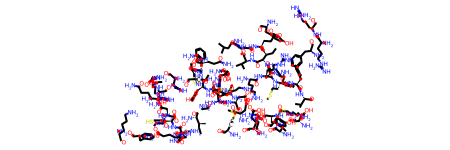

In [8]:
protein_mol

In [6]:
degree = protein.degree_in + protein.degree_out
print("Average degree: ", degree.mean().item())
print("Maximum degree: ", degree.max().item())
print("Minimum degree: ", degree.min().item())
print("Number of zero-degree nodes: ", (degree == 0).sum().item())

Average degree:  15.397260665893555
Maximum degree:  30.0
Minimum degree:  4.0
Number of zero-degree nodes:  0


In [7]:
dataset.data[0][0].num_relation

tensor(7)

In [1]:
import pickle
from torchdrug import utils

In [5]:
protein_pkl = '../../../data/dta-datasets/KIBA/gearnetesm_pocket_Protein.pkl'  # gearnetesm_
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [3]:
protein_list

[Protein(num_atom=586, num_bond=1118, num_residue=73),
 Protein(num_atom=435, num_bond=836, num_residue=55),
 Protein(num_atom=2491, num_bond=4812, num_residue=302),
 Protein(num_atom=1079, num_bond=2072, num_residue=133),
 Protein(num_atom=541, num_bond=1038, num_residue=65),
 Protein(num_atom=719, num_bond=1384, num_residue=87),
 Protein(num_atom=917, num_bond=1754, num_residue=113),
 Protein(num_atom=545, num_bond=1040, num_residue=65),
 Protein(num_atom=598, num_bond=1132, num_residue=76),
 Protein(num_atom=1042, num_bond=1996, num_residue=131),
 Protein(num_atom=596, num_bond=1130, num_residue=74),
 Protein(num_atom=933, num_bond=1792, num_residue=114),
 Protein(num_atom=545, num_bond=1036, num_residue=69),
 Protein(num_atom=67, num_bond=128, num_residue=7),
 Protein(num_atom=580, num_bond=1116, num_residue=67),
 Protein(num_atom=1057, num_bond=2054, num_residue=125),
 Protein(num_atom=2841, num_bond=5518, num_residue=340),
 Protein(num_atom=1007, num_bond=1914, num_residue=122),


In [4]:
protein_list[0].residue_feature.shape

torch.Size([73, 1280])

In [14]:
for protein in protein_list:
    print(protein.residue_feature.shape)
    # degree = protein.degree_in + protein.degree_out
    # print("==============================")
    # print("Average degree: ", degree.mean().item())
    # print("Maximum degree: ", degree.max().item())
    # print("Minimum degree: ", degree.min().item())
    # print("Number of zero-degree nodes: ", (degree == 0).sum().item())
    # print("==============================")

torch.Size([431, 1280])
torch.Size([574, 1280])
torch.Size([1044, 1280])
torch.Size([725, 1280])
torch.Size([970, 1280])
torch.Size([476, 1280])
torch.Size([756, 1280])
torch.Size([403, 1280])
torch.Size([740, 1280])
torch.Size([745, 1280])
torch.Size([365, 1280])
torch.Size([556, 1280])
torch.Size([454, 1280])
torch.Size([272, 1280])
torch.Size([588, 1280])
torch.Size([661, 1280])
torch.Size([1132, 1280])
torch.Size([1388, 1280])
torch.Size([802, 1280])
torch.Size([772, 1280])
torch.Size([890, 1280])
torch.Size([1239, 1280])
torch.Size([591, 1280])
torch.Size([543, 1280])
torch.Size([1130, 1280])
torch.Size([1210, 1280])
torch.Size([648, 1280])
torch.Size([1255, 1280])
torch.Size([796, 1280])
torch.Size([697, 1280])
torch.Size([671, 1280])
torch.Size([1382, 1280])
torch.Size([509, 1280])
torch.Size([537, 1280])
torch.Size([297, 1280])
torch.Size([822, 1280])
torch.Size([972, 1280])
torch.Size([543, 1280])
torch.Size([512, 1280])
torch.Size([1114, 1280])
torch.Size([1367, 1280])
torch.

***

Test for P78527 Len:4128

In [4]:
from torchdrug import data
path = '../../../data/dta-datasets/KIBA/pdb/pdb/'

In [11]:
new_list = [] 
for index in range(15):
    pdb_file = path + 'AF-P78527-F' + str(index+1) + '-model_v4.pdb'
    # print(pdb_file)
    protein = data.Protein.from_pdb(pdb_file)
    new_list.append(protein)
    # print(protein)

In [28]:
sequence = "MAGSGAGVRCSLLRLQETLSAADRCGAALAGHQLIRGLGQECVLSSSPAVLALQTSLVFSRDFGLLVFVRKSLNSIEFRECREEILKFLCIFLEKMGQKIAPYSVEIKNTCTSVYTKDRAAKCKIPALDLLIKLLQTFRSSRLMDEFKIGELFSKFYGELALKKKIPDTVLEKVYELLGLLGEVHPSEMINNAENLFRAFLGELKTQMTSAVREPKLPVLAGCLKGLSSLLCNFTKSMEEDPQTSREIFNFVLKAIRPQIDLKRYAVPSAGLRLFALHASQFSTCLLDNYVSLFEVLLKWCAHTNVELKKAALSALESFLKQVSNMVAKNAEMHKNKLQYFMEQFYGIIRNVDSNNKELSIAIRGYGLFAGPCKVINAKDVDFMYVELIQRCKQMFLTQTDTGDDRVYQMPSFLQSVASVLLYLDTVPEVYTPVLEHLVVMQIDSFPQYSPKMQLVCCRAIVKVFLALAAKGPVLRNCISTVVHQGLIRICSKPVVLPKGPESESEDHRASGEVRTGKWKVPTYKDYVDLFRHLLSSDQMMDSILADEAFFSVNSSSESLNHLLYDEFVKSVLKIVEKLDLTLEIQTVGEQENGDEAPGVWMIPTSDPAANLHPAKPKDFSAFINLVEFCREILPEKQAEFFEPWVYSFSYELILQSTRLPLISGFYKLLSITVRNAKKIKYFEGVSPKSLKHSPEDPEKYSCFALFVKFGKEVAVKMKQYKDELLASCLTFLLSLPHNIIELDVRAYVPALQMAFKLGLSYTPLAEVGLNALEEWSIYIDRHVMQPYYKDILPCLDGYLKTSALSDETKNNWEVSALSRAAQKGFNKVVLKHLKKTKNLSSNEAISLEEIRIRVVQMLGSLGGQINKNLLTVTSSDEMMKSYVAWDREKRLSFAVPFREMKPVIFLDVFLPRVTELALTASDRQTKVAACELLHSMVMFMLGKATQMPEGGQGAPPMYQLYKRTFPVLLRLACDVDQVTRQLYEPLVMQLIHWFTNNKKFESQDTVALLEAILDGIVDPVDSTLRDFCGRCIREFLKWSIKQITPQQQEKSPVNTKSLFKRLYSLALHPNAFKRLGASLAFNNIYREFREEESLVEQFVFEALVIYMESLALAHADEKSLGTIQQCCDAIDHLCRIIEKKHVSLNKAKKRRLPRGFPPSASLCLLDLVKWLLAHCGRPQTECRHKSIELFYKFVPLLPGNRSPNLWLKDVLKEEGVSFLINTFEGGGCGQPSGILAQPTLLYLRGPFSLQATLCWLDLLLAALECYNTFIGERTVGALQVLGTEAQSSLLKAVAFFLESIAMHDIIAAEKCFGTGAAGNRTSPQEGERYNYSKCTVVVRIMEFTTTLLNTSPEGWKLLKKDLCNTHLMRVLVQTLCEPASIGFNIGDVQVMAHLPDVCVNLMKALKMSPYKDILETHLREKITAQSIEELCAVNLYGPDAQVDRSRLAAVVSACKQLHRAGLLHNILPSQSTDLHHSVGTELLSLVYKGIAPGDERQCLPSLDLSCKQLASGLLELAFAFGGLCERLVSLLLNPAVLSTASLGSSQGSVIHFSHGEYFYSLFSETINTELLKNLDLAVLELMQSSVDNTKMVSAVLNGMLDQSFRERANQKHQGLKLATTILQHWKKCDSWWAKDSPLETKMAVLALLAKILQIDSSVSFNTSHGSFPEVFTTYISLLADTKLDLHLKGQAVTLLPFFTSLTGGSLEELRRVLEQLIVAHFPMQSREFPPGTPRFNNYVDCMKKFLDALELSQSPMLLELMTEVLCREQQHVMEELFQSSFRRIARRGSCVTQVGLLESVYEMFRKDDPRLSFTRQSFVDRSLLTLLWHCSLDALREFFSTIVVDAIDVLKSRFTKLNESTFDTQITKKMGYYKILDVMYSRLPKDDVHAKESKINQVFHGSCITEGNELTKTLIKLCYDAFTENMAGENQLLERRRLYHCAAYNCAISVICCVFNELKFYQGFLFSEKPEKNLLIFENLIDLKRRYNFPVEVEVPMERKKKYIEIRKEAREAANGDSDGPSYMSSLSYLADSTLSEEMSQFDFSTGVQSYSYSSQDPRPATGRFRRREQRDPTVHDDVLELEMDELNRHECMAPLTALVKHMHRSLGPPQGEEDSVPRDLPSWMKFLHGKLGNPIVPLNIRLFLAKLVINTEEVFRPYAKHWLSPLLQLAASENNGGEGIHYMVVEIVATILSWTGLATPTGVPKDEVLANRLLNFLMKHVFHPKRAVFRHNLEIIKTLVECWKDCLSIPYRLIFEKFSGKDPNSKDNSVGIQLLGIVMANDLPPYDPQCGIQSSEYFQALVNNMSFVRYKEVYAAAAEVLGLILRYVMERKNILEESLCELVAKQLKQHQNTMEDKFIVCLNKVTKSFPPLADRFMNAVFFLLPKFHGVLKTLCLEVVLCRVEGMTELYFQLKSKDFVQVMRHRDDERQKVCLDIIYKMMPKLKPVELRELLNPVVEFVSHPSTTCREQMYNILMWIHDNYRDPESETDNDSQEIFKLAKDVLIQGLIDENPGLQLIIRNFWSHETRLPSNTLDRLLALNSLYSPKIEVHFLSLATNFLLEMTSMSPDYPNPMFEHPLSECEFQEYTIDSDWRFRSTVLTPMFVETQASQGTLQTRTQEGSLSARWPVAGQIRATQQQHDFTLTQTADGRSSFDWLTGSSTDPLVDHTSPSSDSLLFAHKRSERLQRAPLKSVGPDFGKKRLGLPGDEVDNKVKGAAGRTDLLRLRRRFMRDQEKLSLMYARKGVAEQKREKEIKSELKMKQDAQVVLYRSYRHGDLPDIQIKHSSLITPLQAVAQRDPIIAKQLFSSLFSGILKEMDKFKTLSEKNNITQKLLQDFNRFLNTTFSFFPPFVSCIQDISCQHAALLSLDPAAVSAGCLASLQQPVGIRLLEEALLRLLPAELPAKRVRGKARLPPDVLRWVELAKLYRSIGEYDVLRGIFTSEIGTKQITQSALLAEARSDYSEAAKQYDEALNKQDWVDGEPTEAEKDFWELASLDCYNHLAEWKSLEYCSTASIDSENPPDLNKIWSEPFYQETYLPYMIRSKLKLLLQGEADQSLLTFIDKAMHGELQKAILELHYSQELSLLYLLQDDVDRAKYYIQNGIQSFMQNYSSIDVLLHQSRLTKLQSVQALTEIQEFISFISKQGNLSSQVPLKRLLNTWTNRYPDAKMDPMNIWDDIITNRCFFLSKIEEKLTPLPEDNSMNVDQDGDPSDRMEVQEQEEDISSLIRSCKFSMKMKMIDSARKQNNFSLAMKLLKELHKESKTRDDWLVSWVQSYCRLSHCRSRSQGCSEQVLTVLKTVSLLDENNVSSYLSKNILAFRDQNILLGTTYRIIANALSSEPACLAEIEEDKARRILELSGSSSEDSEKVIAGLYQRAFQHLSEAVQAAEEEAQPPSWSCGPAAGVIDAYMTLADFCDQQLRKEEENASVIDSAELQAYPALVVEKMLKALKLNSNEARLKFPRLLQIIERYPEETLSLMTKEISSVPCWQFISWISHMVALLDKDQAVAVQHSVEEITDNYPQAIVYPFIISSESYSFKDTSTGHKNKEFVARIKSKLDQGGVIQDFINALDQLSNPELLFKDWSNDVRAELAKTPVNKKNIEKMYERMYAALGDPKAPGLGAFRRKFIQTFGKEFDKHFGKGGSKLLRMKLSDFNDITNMLLLKMNKDSKPPGNLKECSPWMSDFKVEFLRNELEIPGQYDGRGKPLPEYHVRIAGFDERVTVMASLRRPKRIIIRGHDEREHPFLVKGGEDLRQDQRVEQLFQVMNGILAQDSACSQRALQLRTYSVVPMTSRLGLIEWLENTVTLKDLLLNTMSQEEKAAYLSDPRAPPCEYKDWLTKMSGKHDVGAYMLMYKGANRTETVTSFRKRESKVPADLLKRAFVRMSTSPEAFLALRSHFASSHALICISHWILGIGDRHLNNFMVAMETGGVIGIDFGHAFGSATQFLPVPELMPFRLTRQFINLMLPMKETGLMYSIMVHALRAFRSDPGLLTNTMDVFVKEPSFDWKNFEQKMLKKGGSWIQEINVAEKNWYPRQKICYAKRKLAGANPAVITCDELLLGHEKAPAFRDYVAVARGSKDHNIRAQEPESGLSEETQVKCLMDQATDPNILGRTWEGWEPWM"

In [12]:
fragment1 = new_list[0]
fragment1

Protein(num_atom=11082, num_bond=22620, num_residue=1400)

In [26]:
fragment1.to_sequence()

'MAGSGAGVRCSLLRLQETLSAADRCGAALAGHQLIRGLGQECVLSSSPAVLALQTSLVFSRDFGLLVFVRKSLNSIEFRECREEILKFLCIFLEKMGQKIAPYSVEIKNTCTSVYTKDRAAKCKIPALDLLIKLLQTFRSSRLMDEFKIGELFSKFYGELALKKKIPDTVLEKVYELLGLLGEVHPSEMINNAENLFRAFLGELKTQMTSAVREPKLPVLAGCLKGLSSLLCNFTKSMEEDPQTSREIFNFVLKAIRPQIDLKRYAVPSAGLRLFALHASQFSTCLLDNYVSLFEVLLKWCAHTNVELKKAALSALESFLKQVSNMVAKNAEMHKNKLQYFMEQFYGIIRNVDSNNKELSIAIRGYGLFAGPCKVINAKDVDFMYVELIQRCKQMFLTQTDTGDDRVYQMPSFLQSVASVLLYLDTVPEVYTPVLEHLVVMQIDSFPQYSPKMQLVCCRAIVKVFLALAAKGPVLRNCISTVVHQGLIRICSKPVVLPKGPESESEDHRASGEVRTGKWKVPTYKDYVDLFRHLLSSDQMMDSILADEAFFSVNSSSESLNHLLYDEFVKSVLKIVEKLDLTLEIQTVGEQENGDEAPGVWMIPTSDPAANLHPAKPKDFSAFINLVEFCREILPEKQAEFFEPWVYSFSYELILQSTRLPLISGFYKLLSITVRNAKKIKYFEGVSPKSLKHSPEDPEKYSCFALFVKFGKEVAVKMKQYKDELLASCLTFLLSLPHNIIELDVRAYVPALQMAFKLGLSYTPLAEVGLNALEEWSIYIDRHVMQPYYKDILPCLDGYLKTSALSDETKNNWEVSALSRAAQKGFNKVVLKHLKKTKNLSSNEAISLEEIRIRVVQMLGSLGGQINKNLLTVTSSDEMMKSYVAWDREKRLSFAVPFREMKPVIFLDVFLPRVTELALTASDRQTKVAACELLHSMVMFMLGKATQMPEGGQGAPPMYQLYKRTFPVLLRLACDVDQVTRQLYEPLVMQLIHWFTNNK

In [29]:
sequence[:1400]

'MAGSGAGVRCSLLRLQETLSAADRCGAALAGHQLIRGLGQECVLSSSPAVLALQTSLVFSRDFGLLVFVRKSLNSIEFRECREEILKFLCIFLEKMGQKIAPYSVEIKNTCTSVYTKDRAAKCKIPALDLLIKLLQTFRSSRLMDEFKIGELFSKFYGELALKKKIPDTVLEKVYELLGLLGEVHPSEMINNAENLFRAFLGELKTQMTSAVREPKLPVLAGCLKGLSSLLCNFTKSMEEDPQTSREIFNFVLKAIRPQIDLKRYAVPSAGLRLFALHASQFSTCLLDNYVSLFEVLLKWCAHTNVELKKAALSALESFLKQVSNMVAKNAEMHKNKLQYFMEQFYGIIRNVDSNNKELSIAIRGYGLFAGPCKVINAKDVDFMYVELIQRCKQMFLTQTDTGDDRVYQMPSFLQSVASVLLYLDTVPEVYTPVLEHLVVMQIDSFPQYSPKMQLVCCRAIVKVFLALAAKGPVLRNCISTVVHQGLIRICSKPVVLPKGPESESEDHRASGEVRTGKWKVPTYKDYVDLFRHLLSSDQMMDSILADEAFFSVNSSSESLNHLLYDEFVKSVLKIVEKLDLTLEIQTVGEQENGDEAPGVWMIPTSDPAANLHPAKPKDFSAFINLVEFCREILPEKQAEFFEPWVYSFSYELILQSTRLPLISGFYKLLSITVRNAKKIKYFEGVSPKSLKHSPEDPEKYSCFALFVKFGKEVAVKMKQYKDELLASCLTFLLSLPHNIIELDVRAYVPALQMAFKLGLSYTPLAEVGLNALEEWSIYIDRHVMQPYYKDILPCLDGYLKTSALSDETKNNWEVSALSRAAQKGFNKVVLKHLKKTKNLSSNEAISLEEIRIRVVQMLGSLGGQINKNLLTVTSSDEMMKSYVAWDREKRLSFAVPFREMKPVIFLDVFLPRVTELALTASDRQTKVAACELLHSMVMFMLGKATQMPEGGQGAPPMYQLYKRTFPVLLRLACDVDQVTRQLYEPLVMQLIHWFTNNK

In [35]:
fragment2 = new_list[7]
fragment2

Protein(num_atom=11237, num_bond=22944, num_residue=1400)

In [36]:
fragment2.to_sequence()

'NLMKALKMSPYKDILETHLREKITAQSIEELCAVNLYGPDAQVDRSRLAAVVSACKQLHRAGLLHNILPSQSTDLHHSVGTELLSLVYKGIAPGDERQCLPSLDLSCKQLASGLLELAFAFGGLCERLVSLLLNPAVLSTASLGSSQGSVIHFSHGEYFYSLFSETINTELLKNLDLAVLELMQSSVDNTKMVSAVLNGMLDQSFRERANQKHQGLKLATTILQHWKKCDSWWAKDSPLETKMAVLALLAKILQIDSSVSFNTSHGSFPEVFTTYISLLADTKLDLHLKGQAVTLLPFFTSLTGGSLEELRRVLEQLIVAHFPMQSREFPPGTPRFNNYVDCMKKFLDALELSQSPMLLELMTEVLCREQQHVMEELFQSSFRRIARRGSCVTQVGLLESVYEMFRKDDPRLSFTRQSFVDRSLLTLLWHCSLDALREFFSTIVVDAIDVLKSRFTKLNESTFDTQITKKMGYYKILDVMYSRLPKDDVHAKESKINQVFHGSCITEGNELTKTLIKLCYDAFTENMAGENQLLERRRLYHCAAYNCAISVICCVFNELKFYQGFLFSEKPEKNLLIFENLIDLKRRYNFPVEVEVPMERKKKYIEIRKEAREAANGDSDGPSYMSSLSYLADSTLSEEMSQFDFSTGVQSYSYSSQDPRPATGRFRRREQRDPTVHDDVLELEMDELNRHECMAPLTALVKHMHRSLGPPQGEEDSVPRDLPSWMKFLHGKLGNPIVPLNIRLFLAKLVINTEEVFRPYAKHWLSPLLQLAASENNGGEGIHYMVVEIVATILSWTGLATPTGVPKDEVLANRLLNFLMKHVFHPKRAVFRHNLEIIKTLVECWKDCLSIPYRLIFEKFSGKDPNSKDNSVGIQLLGIVMANDLPPYDPQCGIQSSEYFQALVNNMSFVRYKEVYAAAAEVLGLILRYVMERKNILEESLCELVAKQLKQHQNTMEDKFIVCLNKVTKSFPPLADRFMNAVFFLLPKFHGVLKTLCLE

In [37]:
sequence[1400:2800]

'NLMKALKMSPYKDILETHLREKITAQSIEELCAVNLYGPDAQVDRSRLAAVVSACKQLHRAGLLHNILPSQSTDLHHSVGTELLSLVYKGIAPGDERQCLPSLDLSCKQLASGLLELAFAFGGLCERLVSLLLNPAVLSTASLGSSQGSVIHFSHGEYFYSLFSETINTELLKNLDLAVLELMQSSVDNTKMVSAVLNGMLDQSFRERANQKHQGLKLATTILQHWKKCDSWWAKDSPLETKMAVLALLAKILQIDSSVSFNTSHGSFPEVFTTYISLLADTKLDLHLKGQAVTLLPFFTSLTGGSLEELRRVLEQLIVAHFPMQSREFPPGTPRFNNYVDCMKKFLDALELSQSPMLLELMTEVLCREQQHVMEELFQSSFRRIARRGSCVTQVGLLESVYEMFRKDDPRLSFTRQSFVDRSLLTLLWHCSLDALREFFSTIVVDAIDVLKSRFTKLNESTFDTQITKKMGYYKILDVMYSRLPKDDVHAKESKINQVFHGSCITEGNELTKTLIKLCYDAFTENMAGENQLLERRRLYHCAAYNCAISVICCVFNELKFYQGFLFSEKPEKNLLIFENLIDLKRRYNFPVEVEVPMERKKKYIEIRKEAREAANGDSDGPSYMSSLSYLADSTLSEEMSQFDFSTGVQSYSYSSQDPRPATGRFRRREQRDPTVHDDVLELEMDELNRHECMAPLTALVKHMHRSLGPPQGEEDSVPRDLPSWMKFLHGKLGNPIVPLNIRLFLAKLVINTEEVFRPYAKHWLSPLLQLAASENNGGEGIHYMVVEIVATILSWTGLATPTGVPKDEVLANRLLNFLMKHVFHPKRAVFRHNLEIIKTLVECWKDCLSIPYRLIFEKFSGKDPNSKDNSVGIQLLGIVMANDLPPYDPQCGIQSSEYFQALVNNMSFVRYKEVYAAAAEVLGLILRYVMERKNILEESLCELVAKQLKQHQNTMEDKFIVCLNKVTKSFPPLADRFMNAVFFLLPKFHGVLKTLCLE

In [38]:
fragment3 = new_list[14]
fragment3

Protein(num_atom=10641, num_bond=21728, num_residue=1328)

In [39]:
fragment3.to_sequence()

'DPIIAKQLFSSLFSGILKEMDKFKTLSEKNNITQKLLQDFNRFLNTTFSFFPPFVSCIQDISCQHAALLSLDPAAVSAGCLASLQQPVGIRLLEEALLRLLPAELPAKRVRGKARLPPDVLRWVELAKLYRSIGEYDVLRGIFTSEIGTKQITQSALLAEARSDYSEAAKQYDEALNKQDWVDGEPTEAEKDFWELASLDCYNHLAEWKSLEYCSTASIDSENPPDLNKIWSEPFYQETYLPYMIRSKLKLLLQGEADQSLLTFIDKAMHGELQKAILELHYSQELSLLYLLQDDVDRAKYYIQNGIQSFMQNYSSIDVLLHQSRLTKLQSVQALTEIQEFISFISKQGNLSSQVPLKRLLNTWTNRYPDAKMDPMNIWDDIITNRCFFLSKIEEKLTPLPEDNSMNVDQDGDPSDRMEVQEQEEDISSLIRSCKFSMKMKMIDSARKQNNFSLAMKLLKELHKESKTRDDWLVSWVQSYCRLSHCRSRSQGCSEQVLTVLKTVSLLDENNVSSYLSKNILAFRDQNILLGTTYRIIANALSSEPACLAEIEEDKARRILELSGSSSEDSEKVIAGLYQRAFQHLSEAVQAAEEEAQPPSWSCGPAAGVIDAYMTLADFCDQQLRKEEENASVIDSAELQAYPALVVEKMLKALKLNSNEARLKFPRLLQIIERYPEETLSLMTKEISSVPCWQFISWISHMVALLDKDQAVAVQHSVEEITDNYPQAIVYPFIISSESYSFKDTSTGHKNKEFVARIKSKLDQGGVIQDFINALDQLSNPELLFKDWSNDVRAELAKTPVNKKNIEKMYERMYAALGDPKAPGLGAFRRKFIQTFGKEFDKHFGKGGSKLLRMKLSDFNDITNMLLLKMNKDSKPPGNLKECSPWMSDFKVEFLRNELEIPGQYDGRGKPLPEYHVRIAGFDERVTVMASLRRPKRIIIRGHDEREHPFLVKGGEDLRQDQRVEQLFQVMNGILAQDSACSQRALQLRTYSVVPMTSR

In [40]:
sequence[2800:]

'DPIIAKQLFSSLFSGILKEMDKFKTLSEKNNITQKLLQDFNRFLNTTFSFFPPFVSCIQDISCQHAALLSLDPAAVSAGCLASLQQPVGIRLLEEALLRLLPAELPAKRVRGKARLPPDVLRWVELAKLYRSIGEYDVLRGIFTSEIGTKQITQSALLAEARSDYSEAAKQYDEALNKQDWVDGEPTEAEKDFWELASLDCYNHLAEWKSLEYCSTASIDSENPPDLNKIWSEPFYQETYLPYMIRSKLKLLLQGEADQSLLTFIDKAMHGELQKAILELHYSQELSLLYLLQDDVDRAKYYIQNGIQSFMQNYSSIDVLLHQSRLTKLQSVQALTEIQEFISFISKQGNLSSQVPLKRLLNTWTNRYPDAKMDPMNIWDDIITNRCFFLSKIEEKLTPLPEDNSMNVDQDGDPSDRMEVQEQEEDISSLIRSCKFSMKMKMIDSARKQNNFSLAMKLLKELHKESKTRDDWLVSWVQSYCRLSHCRSRSQGCSEQVLTVLKTVSLLDENNVSSYLSKNILAFRDQNILLGTTYRIIANALSSEPACLAEIEEDKARRILELSGSSSEDSEKVIAGLYQRAFQHLSEAVQAAEEEAQPPSWSCGPAAGVIDAYMTLADFCDQQLRKEEENASVIDSAELQAYPALVVEKMLKALKLNSNEARLKFPRLLQIIERYPEETLSLMTKEISSVPCWQFISWISHMVALLDKDQAVAVQHSVEEITDNYPQAIVYPFIISSESYSFKDTSTGHKNKEFVARIKSKLDQGGVIQDFINALDQLSNPELLFKDWSNDVRAELAKTPVNKKNIEKMYERMYAALGDPKAPGLGAFRRKFIQTFGKEFDKHFGKGGSKLLRMKLSDFNDITNMLLLKMNKDSKPPGNLKECSPWMSDFKVEFLRNELEIPGQYDGRGKPLPEYHVRIAGFDERVTVMASLRRPKRIIIRGHDEREHPFLVKGGEDLRQDQRVEQLFQVMNGILAQDSACSQRALQLRTYSVVPMTSR